In [2]:
'''
@auther : Uzma S. L.

Getting the best sample image from every class for trainig model using one shot learning .
The image should represent most of the information about the class, So here we are calculating entropy of all the images and getting image with the highest entropy,
which will be the most representative sample image of that class.

'''

In [22]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2gray
import skimage.measure  
import pandas as pd  

In [ ]:
# Lets calculate entropy of a single image first

In [7]:
# reading image
img = imread('/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images/Artocarpus Heterophyllus (Jackfruit)/AH-S-001.jpg')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


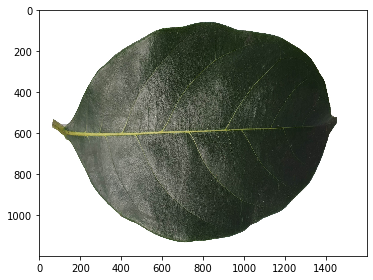

In [9]:
# visualizing image in rgb
imshow(img);

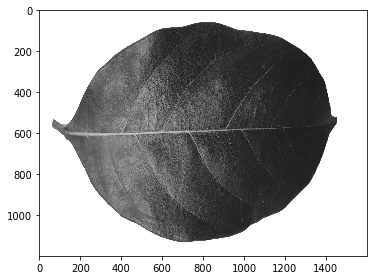

In [10]:
# visualizing image in grayscale 

img_gray = rgb2gray(img)
imshow(img_gray);

In [11]:
# filtering the image, by its local entropy
img_entropy = entropy(img_gray, disk(5))

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


In [11]:
# visualizing image entropy

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


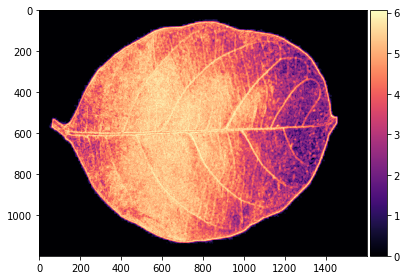

In [12]:
imshow(img_entropy, cmap='magma');

In [13]:
# calculating image entropy
entropy = skimage.measure.shannon_entropy(img)

In [14]:
entropy

4.784118176281935

In [ ]:
# now lets calculate entropy of all images and get the image with highest entropy

In [19]:
def best_image_extractor(data_dir):
  '''
  returns image path of all classes with max entropy.
  '''
  cat_entropy_dicto = {}

  for cat in os.listdir(data_dir):            # looping over classes
    img_entropy = {}
    path = os.path.join(data_dir, cat)

    for impath in os.listdir(path):            # looping over images of the class
      fname = os.path.join(path, impath)
      img = imread(fname=fname)
      entropy = skimage.measure.shannon_entropy(img)
      img_entropy[fname] = entropy              # dictionary like {"image path" : "image entropy"}
      v = list(img_entropy.values())
      k = list(img_entropy.keys())
      max_v = max(v)                            # getting max entropy value
      max_entropy_img = k[v.index(max_v)]      # getting image with highest entropy


    cat_entropy_dicto[cat] = [max_entropy_img, max_v]    # dictionary like { "class name" : { "best image path": "max entropy" }}

  return cat_entropy_dicto

ent = best_image_extractor('/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images')  


In [20]:
ent

{'Alpinia Galanga (Rasna)': ['/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images/Alpinia Galanga (Rasna)/AG-S-040.jpg',
  2.6573739765212],
 'Amaranthus Viridis (Arive-Dantu)': ['/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images/Amaranthus Viridis (Arive-Dantu)/AV-S-106.jpg',
  4.089368136544459],
 'Artocarpus Heterophyllus (Jackfruit)': ['/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images/Artocarpus Heterophyllus (Jackfruit)/AH-S-049.jpg',
  5.04877167394571],
 'Azadirachta Indica (Neem)': ['/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images/Azadirachta Indica (Neem)/AI-S-006.jpg',
  4.019906870819336],
 'Basella Alba (Basale)': ['/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images/Basella Alba (Basale)/BA-S-028.jpg',
  5.1795971120804065],
 'Brassica Juncea (Indian Mustard)': ['/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images/Brassica Juncea (Indian Mustard)/BJ-S-031.jpg',
  4.264056904996712],
 'Carissa Carand

In [21]:
len(ent)

30

In [23]:
df = pd.DataFrame(ent)

In [24]:
df.head()

,Punica Granatum (Pomegranate),Plectranthus Amboinicus (Mexican Mint),Pongamia Pinnata (Indian Beech),Syzygium Cumini (Jamun),Trigonella Foenum-graecum (Fenugreek),Syzygium Jambos (Rose Apple),Santalum Album (Sandalwood),Psidium Guajava (Guava),Piper Betle (Betel),Tabernaemontana Divaricata (Crape Jasmine),Moringa Oleifera (Drumstick),Ocimum Tenuiflorum (Tulsi),Muntingia Calabura (Jamaica Cherry-Gasagase),Hibiscus Rosa-sinensis,Jasminum (Jasmine),Murraya Koenigii (Curry),Mentha (Mint),Nerium Oleander (Oleander),Nyctanthes Arbor-tristis (Parijata),Mangifera Indica (Mango),Ficus Auriculata (Roxburgh fig),Alpinia Galanga (Rasna),Ficus Religiosa (Peepal Tree),Carissa Carandas (Karanda),Amaranthus Viridis (Arive-Dantu),Artocarpus Heterophyllus (Jackfruit),Brassica Juncea (Indian Mustard),Basella Alba (Basale),Azadirachta Indica (Neem),Citrus Limon (Lemon)
0,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...,/content/drive/MyDrive/Project/Segmented Medic...
1,4.45457,3.42661,4.68842,4.56454,2.55303,3.37501,4.72644,5.7601,4.63967,4.47536,3.77588,5.0222,4.06949,4.00287,4.84046,4.11027,4.53069,2.51468,3.63587,2.72599,5.96575,2.65737,3.44171,3.86663,4.08937,5.04877,4.26406,5.1796,4.01991,4.43006


In [27]:
r1 = df.loc[0,:]

In [28]:
r1

Punica Granatum (Pomegranate)                   /content/drive/MyDrive/Project/Segmented Medic...
Plectranthus Amboinicus (Mexican Mint)          /content/drive/MyDrive/Project/Segmented Medic...
Pongamia Pinnata (Indian Beech)                 /content/drive/MyDrive/Project/Segmented Medic...
Syzygium Cumini (Jamun)                         /content/drive/MyDrive/Project/Segmented Medic...
Trigonella Foenum-graecum (Fenugreek)           /content/drive/MyDrive/Project/Segmented Medic...
Syzygium Jambos (Rose Apple)                    /content/drive/MyDrive/Project/Segmented Medic...
Santalum Album (Sandalwood)                     /content/drive/MyDrive/Project/Segmented Medic...
Psidium Guajava (Guava)                         /content/drive/MyDrive/Project/Segmented Medic...
Piper Betle (Betel)                             /content/drive/MyDrive/Project/Segmented Medic...
Tabernaemontana Divaricata (Crape Jasmine)      /content/drive/MyDrive/Project/Segmented Medic...
Moringa Oleifera (Dr

In [45]:
# os.mkdir('Data')